In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_pc = pd.read_csv("data/pc_annual_returns.csv", index_col=0)
df_b = pd.read_csv("data/betterment_annual_returns.csv", index_col=0)
display(df_pc)
display(df_b)

,Aggressive 1,Growth 2,Moderate 3,Balanced 4,Conservative 5,Tactical America 6,S&P 500 Proxy ETF (SPY)
2012,0.183,0.169,0.155,0.135,0.113,0.178,0.160
2013,0.221,0.180,0.140,0.102,0.074,0.340,0.323
2014,0.039,0.032,0.026,0.022,0.020,0.071,0.135
2015,-0.015,-0.020,-0.025,-0.027,-0.029,0.018,0.012
2016,0.108,0.102,0.096,0.085,0.077,0.141,0.120
2017,0.179,0.163,0.142,0.118,0.100,0.164,0.217
2018,-0.083,-0.075,-0.067,-0.056,-0.048,-0.060,-0.046


,S&P 500 Index,Betterment 100% stock,Betterment 90% stock,Betterment 80% stock,Betterment 70% stock,Betterment 60% stock,Betterment 50% stock,Avg. private client investor 80-100% equity risk,Betterment 40% stock,Avg. private client investor 60-80% equity risk,Betterment 30% stock,Avg. private client investor 40-60% equity risk,Betterment 20% stock,Avg. private client investor 0-40% equity risk,Five year U.S. Treasury Bills,Betterment 10% stock,Betterment 0% stock
2004,0.085489,0.154258,0.141932,0.129503,0.116964,0.104325,0.091516,0.094769,0.077358,0.065694,0.060070,0.051742,0.042849,0.034695,0.031634,0.025716,0.008659
2005,0.048263,0.122470,0.112304,0.101777,0.091029,0.079910,0.068513,0.084385,0.057864,0.071405,0.049152,0.055498,0.040357,0.035862,0.040446,0.031483,0.022530
2006,0.158427,0.216435,0.195243,0.174136,0.152878,0.131714,0.110459,0.156242,0.091546,0.128393,0.077124,0.106413,0.062658,0.067839,0.047437,0.048156,0.033624
2007,0.051452,0.087659,0.085989,0.083276,0.080017,0.075316,0.069843,0.125240,0.064832,0.097233,0.062258,0.085663,0.059325,0.070393,0.044230,0.056003,0.052301
2008,-0.367879,-0.396845,-0.364963,-0.333093,-0.300741,-0.269697,-0.238691,-0.350690,-0.201430,-0.263343,-0.146921,-0.189593,-0.090752,-0.097718,0.027965,-0.033174,0.025702
2009,0.263455,0.348193,0.330297,0.311262,0.291469,0.272007,0.252132,0.254368,0.220044,0.211484,0.162441,0.140916,0.106359,0.083726,0.021899,0.051924,-0.000888
2010,0.150533,0.156148,0.147561,0.138052,0.128521,0.118078,0.107624,0.101074,0.092579,0.087866,0.069016,0.063057,0.045498,0.046525,0.019260,0.022048,-0.001309
2011,0.018946,-0.063578,-0.050530,-0.038335,-0.026124,-0.015125,-0.004183,-0.090626,0.002736,-0.060143,0.002572,-0.044974,0.001758,-0.016560,0.015208,0.000272,-0.001858
2012,0.159876,0.173015,0.161233,0.149446,0.137486,0.125878,0.114208,0.134201,0.098327,0.106736,0.072671,0.087795,0.047367,0.063119,0.007606,0.022442,-0.002125
2013,0.323022,0.240260,0.209735,0.180112,0.151460,0.123392,0.096246,0.168849,0.071840,0.131377,0.053068,0.095143,0.034420,0.041694,0.011717,0.015886,-0.002504


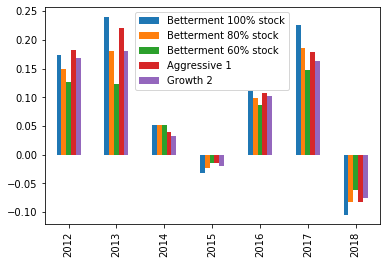

In [3]:
df = df_b.merge(
    df_pc,
    left_index=True,
    right_index=True,
    how='inner'
)

assert ((df['S&P 500 Index'] - df['S&P 500 Proxy ETF (SPY)']).abs() < 0.004).all()

df[['Betterment 100% stock', 'Betterment 80% stock', 'Betterment 60% stock', 'Aggressive 1', 'Growth 2']].plot.bar()


S&P 500 Index                                       0.125846
S&P 500 Proxy ETF (SPY)                             0.125808
Tactical America 6                                  0.115451
Betterment 100% stock                               0.088198
Aggressive 1                                        0.085060
Betterment 90% stock                                0.081978
Betterment 80% stock                                0.075617
Growth 2                                            0.074521
Betterment 70% stock                                0.069308
Moderate 3                                          0.063442
Betterment 60% stock                                0.062945
Avg. private client investor 80-100% equity risk    0.061772
Betterment 50% stock                                0.056711
Balanced 4                                          0.051818
Betterment 40% stock                                0.048690
Avg. private client investor 60-80% equity risk     0.048546
Conservative 5          

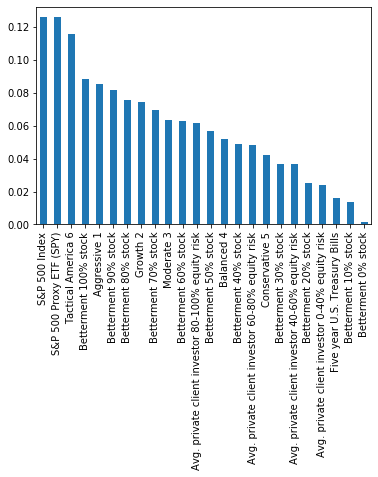

In [4]:
df_cumulative_return = ((df + 1.).apply(stats.gmean) - 1.).sort_values(ascending=False)
df_cumulative_return.plot.bar()
df_cumulative_return